In [1]:
from runner import *

plotpath = parent_directory + "\\plots\\"
plotting.set_dir(plotpath)

loading complete, calculating accuracy
getting human labeled boundaries
complete


## Divided Method

In [2]:
box = bbox[1]
rna = RNA[RNA["global_y"] < box[0] + box[2]]
rna = rna[RNA["global_x"] < box[1] + box[3]]
rna = rna[RNA["global_y"] > box[0]]
rna = rna[RNA["global_x"] > box[1]]

C:\Users\Harrison\AppData\Local\Temp\ipykernel_18148\2354860879.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rna = rna[RNA["global_x"] < box[1] + box[3]]
C:\Users\Harrison\AppData\Local\Temp\ipykernel_18148\2354860879.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rna = rna[RNA["global_y"] > box[0]]
C:\Users\Harrison\AppData\Local\Temp\ipykernel_18148\2354860879.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rna = rna[RNA["global_x"] > box[1]]


In [3]:
from scipy.spatial.distance import squareform, pdist

dismat = squareform(pdist(rna.loc[:, ["global_y", "global_x"]]))

In [4]:
radius = 25
distance_max = 50
densities = np.sum((dismat <= distance_max)*np.exp(-(dismat/radius)**2), axis=1)
density_pw_comp = densities[:, None] >= densities

In [ ]:
densities

In [5]:
distance_if_higher = dismat.copy()
distance_if_higher[density_pw_comp] = 1000
nearest = np.argmin(distance_if_higher, axis=1)

In [6]:
rna["density"] = densities
distance_to_nearest = [dismat[i,j] for i, j in enumerate(nearest)]
rna["distance2nearest"] = distance_to_nearest

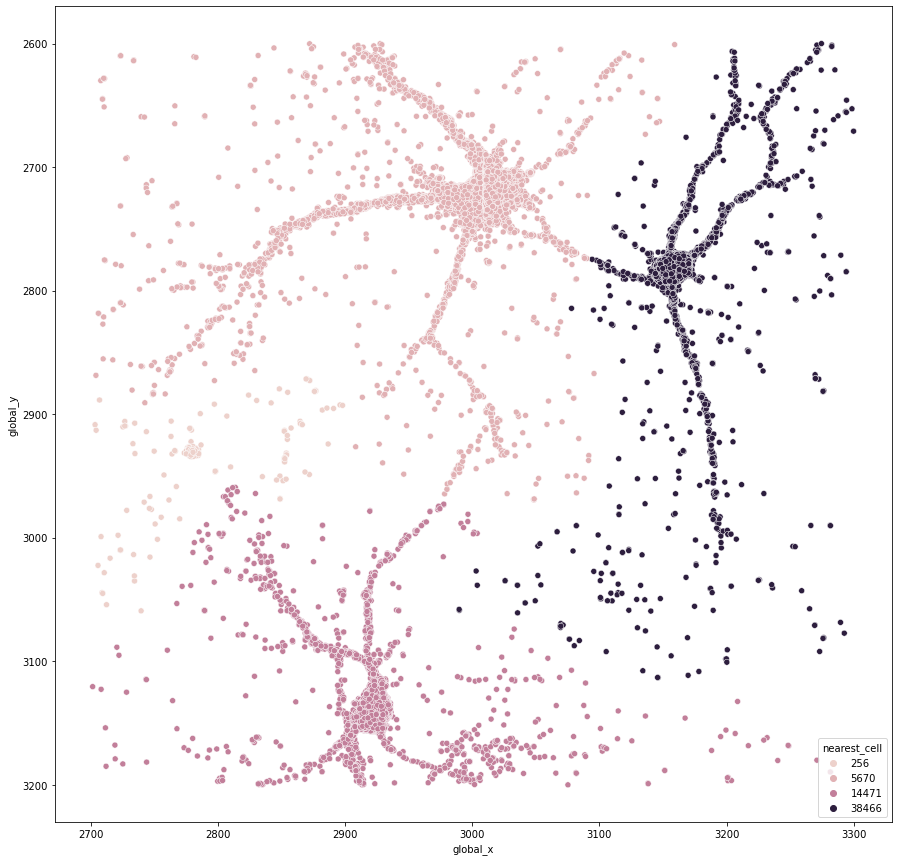

In [7]:
nearest_cell = [i if distance_to_nearest[i] > 100 else j for i, j in enumerate(nearest)]
for i in range(25):
    nearest_cell = [nearest_cell[j] for j in nearest_cell]
rna["nearest_cell"] = nearest_cell
plt.figure(figsize=(15,15))
sns.scatterplot(data=rna, y="global_y", x="global_x", hue="nearest_cell")
plt.gca().invert_yaxis()
plt.show()
# plt.figure(figsize=(15,15))
# sns.scatterplot(data=rna, y="global_y", x="global_x", hue="density")
# plt.gca().invert_yaxis()
# plt.show()
# plt.figure(figsize=(15,15))
# sns.scatterplot(data=rna, y="global_y", x="global_x", hue="distance2nearest")
# plt.gca().invert_yaxis()
# plt.show()

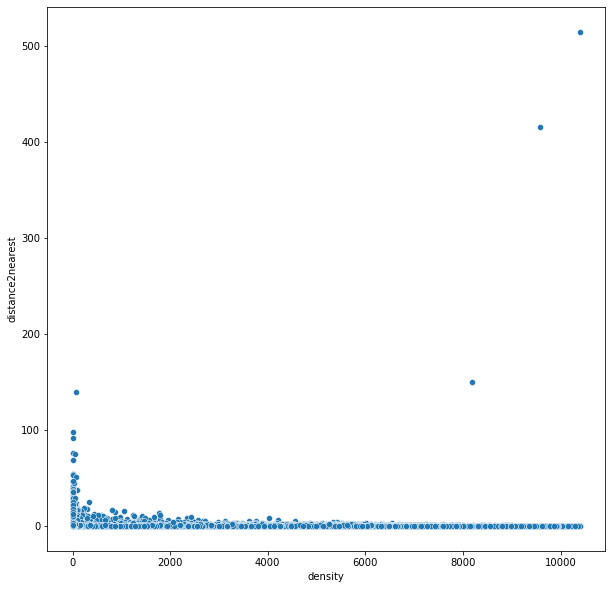

In [8]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=rna, x="density", y="distance2nearest")
plt.show()

## WIP Method

In [2]:
from scipy.spatial import KDTree

In [3]:
rna_spatial_arr = np.array([RNA['global_y'], RNA['global_x'], RNA['global_z']]).T
tree = KDTree(rna_spatial_arr)

In [7]:
counts = tree.query_ball_point(rna_spatial_arr, 5, return_length=True)

In [10]:
RNA['5_rho'] = counts
RNA

,barcode_id,global_x,global_y,global_z,x,y,fov,cell_index,process_index,mean_intensity,area,min_distance,distance2Center,5_rho
0,15,25.2720,34.3440,5.500123,234.00000,318.00000,0,0,0,425.224100,12,0.566813,inf,2
1,94,12.3530,56.3429,0.197061,114.38024,521.69390,0,0,0,16.499912,8,0.528758,inf,1
2,292,76.2393,81.6588,2.361537,705.91870,756.10060,0,0,0,19.605745,10,0.582155,inf,2
3,301,143.1442,114.2542,4.960983,1325.40890,1057.90920,0,0,0,6.585202,17,0.531590,inf,1
4,311,92.9736,125.2798,3.174463,860.86750,1159.99800,0,0,0,2.895917,9,0.490385,inf,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1991679,1165,4135.9170,4113.4360,4.000000,1258.49160,1050.33360,440,0,0,1.706571,5,0.182840,inf,1
1991680,1207,4169.1445,4055.1887,0.000000,1566.15210,511.00600,440,0,0,12.079899,8,0.485871,inf,1
1991681,1217,4179.1042,4010.9442,0.484333,1658.37280,101.33566,440,0,0,14.926578,25,0.189891,inf,2
1991682,1224,4160.4014,4039.4536,0.060109,1485.19680,365.31097,440,0,0,12.480190,9,0.390742,inf,2


In [ ]:
pre_segmentation_image = np.array((thresholdedProcessImage > 0) + 2 * (somaImage > 0), dtype=float)

plotting.colorplot(plotting.panel(pre_segmentation_image, bbox, 1), two_map, interpolation="None",
                   name="temp")